# Zoom Data Analytics - Chasz Griego

The goal of this assignment is to read and analyze data collected from a [Zoom webinar](https://canvas.cmu.edu/courses/14759/files/4702717/download?wrap=1) using Pandas DataFrames.

First we read our data (.csv file) using `read_csv()`. The file contains a column with indexes, so we use `index_col=0` to make that column the index. `na_values='--'` is used to convert the string `--` into `NaN` because it appears often in this file.

In [31]:
import pandas as pd
df = pd.read_csv('cleaned-attendee-report.csv',index_col=0,na_values='--')

In [32]:
df.head()

,Email,Registration Time,Approval Status,Join Time,Leave Time,Time in Session (minutes),Country/Region Name
0,MFVV8X1@6PD.Q6N.edu,3/24/20 11:35,approved,3/24/20 11:35,3/24/20 14:12,157.0,United States
1,91L5J49@N6U.6P2.edu,3/23/20 16:23,approved,3/24/20 10:41,3/24/20 14:06,205.0,United States
2,XTXIBKU@MS8.WHR.edu,3/24/20 12:43,approved,3/24/20 12:43,3/24/20 12:45,3.0,United States
3,RJZJ5PP@5Z5.0N9.edu,3/24/20 12:29,approved,3/24/20 14:17,3/24/20 14:42,25.0,Italy
4,RJZJ5PP@5Z5.0N9.edu,NaN,NaN,3/24/20 12:30,3/24/20 12:32,2.0,Italy


One of the columns in the Dataframe is called `Time in Session (minutes)`. This is the time a participant spent in the webinar in minutes. For reasons explained later in the notebook, a new column is added that has these values converted to hours.

In [33]:
df['Time in Session (hours)'] = df['Time in Session (minutes)'].apply(lambda x: x / 60)

### Task 1: Use `df.describe()`

Below this function is called and displays a summary about only the data in the "Time in Session" columns. This summary includes, the number of items, the mean value, min and max values, and others.

In [34]:
df.describe()

,Time in Session (minutes),Time in Session (hours)
count,863.000000,863.000000
mean,72.443801,1.207397
std,85.962957,1.432716
min,0.000000,0.000000
25%,5.000000,0.083333
50%,36.000000,0.600000
75%,108.000000,1.800000
max,313.000000,5.216667


### Task 2: Count the number of people registered

People are anonymously identified with an email address in this DataFrame. There will be a unique address for each person registered. We can count them using `.unique()`

In [35]:
len(df['Email'].unique())

487

### Task 3: Count the number of people that attended the symposium

Next we can count how many of the people who registered actually joined the webinar on Zoom. Here we can use the "Time in Session" columns. If a registered person didn't attend, these columns will contain `NaN` values. We'll drop these rows using `df.dropna()` and store the output to a new variable. Then we use the same approach as above to count the number of attendees.

In [36]:
d1 = df.dropna(subset=['Time in Session (minutes)','Time in Session (hours)'])
len(d1['Email'].unique())

433

### Task 4: List the unique countries and count them

Next we can make a group using `.groupby` to sort the DataFrame by values in the colum `Country/Region Name`. We can store each unique country in a list using a list comprehension looping through every index in the group. Then we return the length of the list to count the number of countries. Alternatively, all of this can be done using `d1['Country/Region Name'].unique()`.

In [37]:
country_group = d1.groupby('Country/Region Name')
countries = [key for key in country_group.indices]
len(countries)

34

### Task 5: Plot a histogram of total time in session for each user and compute the average time spent in the session. 

Here we're interested in seeing how long people stayed in the session. Some users came in and out of the webinar, so they have multiple entries with different records of "Time in Session" that need to be aggregated. We can group together the rows in our DataFrame that pertain to one user (one email) with `df.groupby('Email')` and sum the time intervals using `.sum()`.

In [38]:
user_group = df.groupby(['Email'])
total_time = user_group.sum()

Below is the histogram using the column `Time in Session (minutes`. The biggest take-away is that many participants didn't stay in the session longer an hour and only a small handful stayed for the whole duration.

Text(0.5,1,'Histogram of User Time Spent in Session')

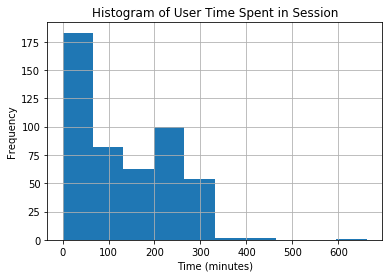

In [44]:
from matplotlib import pyplot as plt
total_time.hist('Time in Session (minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of User Time Spent in Session')

I thought it would also be more informative to see this histogram with hours in the x axis. That's the main reason the `Time in Session (hours)` column was added. Now it's easier to see that an hour or less in the webinar was the most common time spent.

Text(0.5,1,'Histogram of User Time Spent in Session')

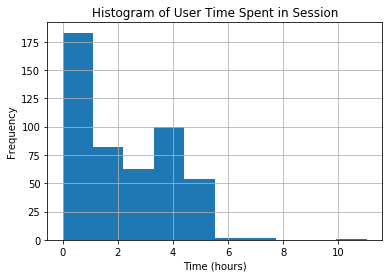

In [46]:
total_time.hist('Time in Session (hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of User Time Spent in Session')

Below are the average values for the time spent. The average participant spent a little over 2 hours in the webinar.

In [14]:
total_time.mean()

Time in Session (minutes)    128.375770
Time in Session (hours)        2.139596
dtype: float64